In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C://Users//sebas//OneDrive//Documents//Data//fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
label_map=['Anger','Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [4]:
df_train=df[df['Usage']=='Training']
df_val=df[df['Usage']=='PrivateTest']
df_test=df[df['Usage']=='PublicTest']

In [5]:
train_samples=np.array([np.fromstring(img, np.uint8, sep=" ").reshape((48,48,1)) for img in df_train['pixels']])
train_raw_labels=df_train['emotion'].values
train_labels=np.reshape(train_raw_labels, (len(train_raw_labels),1))

val_samples=np.array([np.fromstring(img, np.uint8, sep=" ").reshape((48,48,1)) for img in df_val['pixels']])
val_raw_labels=df_val['emotion'].values
val_labels=np.reshape(val_raw_labels, (len(val_raw_labels),1))

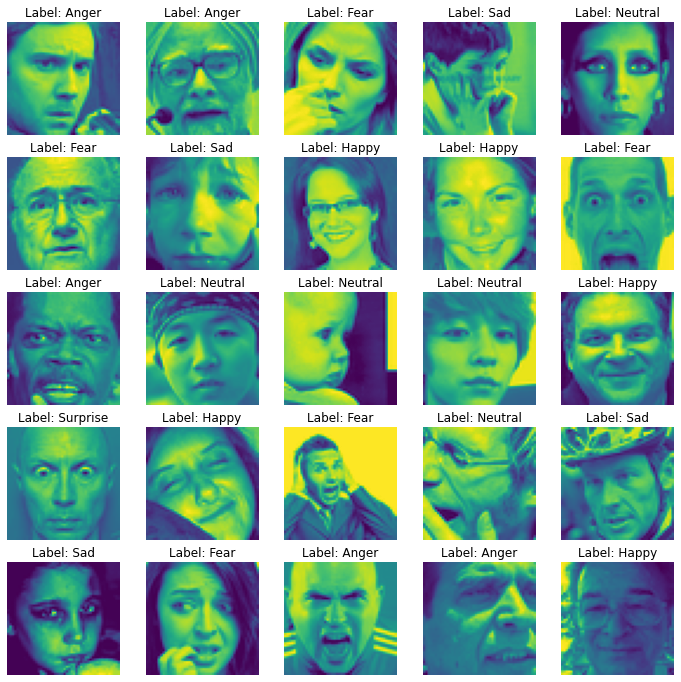

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 4
ncols = 4

fig=plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.axis('Off')
    plt.imshow(train_samples[i])
    plt.title("Label: {}".format(label_map[train_raw_labels[i]]))

In [7]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=len(label_map))
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=len(label_map))

In [8]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data =train_samples.reshape(train_samples.shape[0], 1 * 48 * 48)
train_data = scaler.fit_transform(train_data)'''

datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = datagen.flow(train_samples, train_labels, batch_size=64, seed=123)
val_generator = datagen.flow(val_samples, val_labels, batch_size=64, seed=123)                                       

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(256, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(len(label_map)))
model.add(tf.keras.layers.Activation('softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0

In [11]:
#checkpoint_filepath = '/temp/checkpoint'
#checkpoint= keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
#                                            mode='auto')

model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(lr=0.001),
             metrics=['accuracy'])

In [12]:
history = model.fit(train_generator,
                              validation_data=val_generator,
                              steps_per_epoch=100,
                              #callbacks=[checkpoint],
                              epochs=30,
                              validation_steps=50,
                              verbose=2)
print("Finished!")

Epoch 1/30
100/100 - 141s - loss: 2.1471 - accuracy: 0.2545 - val_loss: 2.0941 - val_accuracy: 0.2491
Epoch 2/30
100/100 - 133s - loss: 1.8238 - accuracy: 0.3278 - val_loss: 2.1000 - val_accuracy: 0.1678
Epoch 3/30
100/100 - 133s - loss: 1.6761 - accuracy: 0.3758 - val_loss: 1.8704 - val_accuracy: 0.2506
Epoch 4/30
100/100 - 132s - loss: 1.5290 - accuracy: 0.4257 - val_loss: 1.7810 - val_accuracy: 0.2788
Epoch 5/30
100/100 - 132s - loss: 1.4366 - accuracy: 0.4567 - val_loss: 1.5188 - val_accuracy: 0.3975
Epoch 6/30
100/100 - 133s - loss: 1.3877 - accuracy: 0.4747 - val_loss: 1.3920 - val_accuracy: 0.4500
Epoch 7/30
100/100 - 133s - loss: 1.3042 - accuracy: 0.5006 - val_loss: 1.3736 - val_accuracy: 0.4850
Epoch 8/30
100/100 - 133s - loss: 1.2632 - accuracy: 0.5169 - val_loss: 1.3721 - val_accuracy: 0.4675
Epoch 9/30
100/100 - 133s - loss: 1.2213 - accuracy: 0.5423 - val_loss: 1.2882 - val_accuracy: 0.5103
Epoch 10/30
100/100 - 136s - loss: 1.1773 - accuracy: 0.5589 - val_loss: 1.2289 - 

Text(0.5, 1.0, 'Training and validation loss')

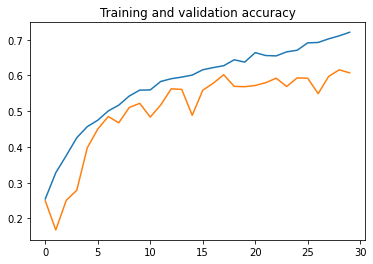

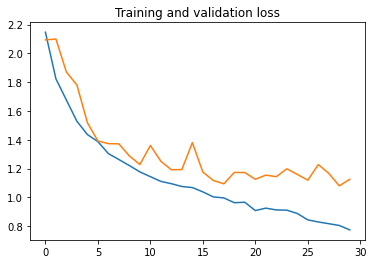

In [14]:
import matplotlib.pyplot as plt
acc      = history.history['accuracy' ]
val_acc  = history.history['val_accuracy' ]
loss     = history.history['loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

plt.plot  ( epochs, acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs, loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [15]:
test_samples=np.array([np.fromstring(img, np.uint8, sep=" ").reshape((48,48,1)) for img in df_test['pixels']])
test_datagen = ImageDataGenerator(
    rescale = 1./255.)
test_raw_labels=df_test['emotion'].values
test_labels=np.reshape(test_raw_labels, (len(test_raw_labels),1))

test_generator = datagen.flow(test_samples, test_labels, batch_size=64, shuffle = False)    

In [16]:
print("Evaluate on test data")
results = model.evaluate(val_generator)
print("val loss, val acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(test_generator)
predicted_class_indices=np.argmax(predictions, axis=1)
print("Three predictions: ", predicted_class_indices[:3])
print("Actual test scores: ", test_raw_labels[:3])
print("predictions shape:", predictions.shape)
print("actual test shape: ", test_raw_labels.shape)

Evaluate on test data
57/57 [==============================] - 11s 200ms/step - loss: 1.1306 - accuracy: 0.6032
val loss, val acc: [1.1305830478668213, 0.6032320857048035]
Generate predictions for 3 samples
Three predictions:  [0 3 0]
Actual test scores:  [0 1 4]
predictions shape: (3589, 7)
actual test shape:  (3589,)


In [17]:
test_acc = (test_raw_labels == predicted_class_indices).sum()/len(test_raw_labels)
print(test_acc)

0.5976595151852884


Text(0.5, 1.0, 'Label: Anger')

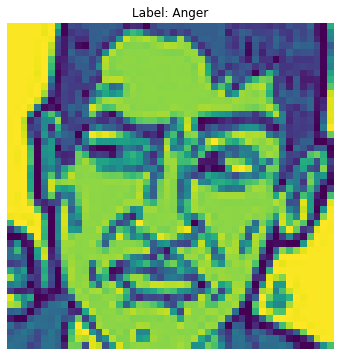

In [18]:
first_accurate_img = next(idx for idx, img in enumerate(test_raw_labels==predicted_class_indices) if img)

fig=plt.figure(figsize=(6, 6))
plt.axis('Off')
plt.imshow(test_samples[first_accurate_img])
plt.title("Label: {}".format(label_map[np.argmax(predictions[first_accurate_img])]))